### 1. Загрузите тренировочные и тестовые датасеты

In [40]:
import pandas as pd
import numpy as np 

from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures


In [10]:
Xtrain = pd.read_csv("TrainData.csv")
Xtrain = Xtrain.dropna()
print("Размер датасета:", Xtrain.shape)
print("Пропущенные значения:")
print(Xtrain.isnull().sum())
Xtrain


Размер датасета: (5567, 15)
Пропущенные значения:
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7494,40,218.593930,120277,0.171817,9,0.049127,0.071672,0.009499,25.606721,0.300298,0.0,0,40,0.249475,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


In [9]:
Xtest = pd.read_csv("TestData.csv")
print("Размер датасета:", Xtest.shape)
print("Пропущенные значения:")
print(Xtest.isnull().sum())
Xtest


Размер датасета: (2500, 15)
Пропущенные значения:
f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,70,0.238933,1
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,0.238933,23.893333,0.238933,7298,0,50,0.238933,1


### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

In [13]:
print(Xtrain['target'].value_counts())
print(Xtest['target'].value_counts())


target
0    4238
1    1329
Name: count, dtype: int64
target
0    1913
1     587
Name: count, dtype: int64


* Дисбаланс классов значительный, метрика accuracy может быть не очень информативной. Это происходит из-за того, что модель может предсказывать большинство объектов как класс 0 и при этом показывать высокую точность, игнорируя меньшинство класса 1.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [38]:
X = Xtrain.drop('target', axis=1)  
y = Xtrain['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
print(f'F1-мера для Logistic Regression: {f1_logreg:.4f}')

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("\n\nSVC Classification Report:")
print(classification_report(y_test, y_pred_svc))
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
print(f'F1-мера для SVC: {f1_svc:.4f}')


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       848
           1       0.74      0.56      0.64       266

    accuracy                           0.85      1114
   macro avg       0.81      0.75      0.77      1114
weighted avg       0.84      0.85      0.84      1114

F1-мера для Logistic Regression: 0.8413


SVC Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       848
           1       0.77      0.54      0.63       266

    accuracy                           0.85      1114
   macro avg       0.82      0.74      0.77      1114
weighted avg       0.84      0.85      0.84      1114

F1-мера для SVC: 0.8415


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

#### №1

In [18]:
# Logistic Regression с class_weight='balanced'
logreg_balanced = LogisticRegression(random_state=42, class_weight='balanced')
logreg_balanced.fit(X_train, y_train)
y_pred_logreg_balanced = logreg_balanced.predict(X_test)

print("Logistic Regression (balanced) Classification Report:")
print(classification_report(y_test, y_pred_logreg_balanced))
f1_logreg_balanced = f1_score(y_test, y_pred_logreg_balanced, average='weighted')
print(f'F1-мера для Logistic Regression (balanced): {f1_logreg_balanced:.4f}')


Logistic Regression (balanced) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       848
           1       0.58      0.88      0.69       266

    accuracy                           0.82      1114
   macro avg       0.76      0.84      0.78      1114
weighted avg       0.86      0.82      0.83      1114

F1-мера для Logistic Regression (balanced): 0.8268


#### №2

In [25]:
# SVC с class_weight='balanced' и изменёнными параметрами C и радиально-базисным ядром
svc_optimized = SVC(random_state=42, class_weight='balanced', C=0.5, kernel='rbf')
svc_optimized.fit(X_train, y_train)
y_pred_svc_optimized = svc_optimized.predict(X_test)

print("\n\nSVC (optimized) Classification Report:")
print(classification_report(y_test, y_pred_svc_optimized))
f1_svc_optimized = f1_score(y_test, y_pred_svc_optimized, average='weighted')
print(f'F1-мера для SVC: {f1_svc_optimized:.4f}')




SVC (optimized) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       848
           1       0.55      0.89      0.68       266

    accuracy                           0.80      1114
   macro avg       0.75      0.83      0.76      1114
weighted avg       0.86      0.80      0.81      1114

F1-мера для SVC: 0.8094


#### №3

In [22]:
# Logistic Regression с полиномиальными признаками
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)

logreg_poly = LogisticRegression(random_state=42, class_weight='balanced')
logreg_poly.fit(X_train_poly, y_train_poly)
y_pred_logreg_poly = logreg_poly.predict(X_test_poly)

print("\n\nLogistic Regression (polynomial features) Classification Report:")
print(classification_report(y_test_poly, y_pred_logreg_poly))
f1_logreg_poly = f1_score(y_test_poly, y_pred_logreg_poly, average='weighted')
print(f'F1-мера для Logistic Regression (polynomial features): {f1_logreg_poly:.4f}')




Logistic Regression (polynomial features) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       848
           1       0.57      0.88      0.69       266

    accuracy                           0.81      1114
   macro avg       0.76      0.83      0.78      1114
weighted avg       0.86      0.81      0.82      1114

F1-мера для Logistic Regression (polynomial features): 0.8221


#### №4

In [24]:
# Обучение модели SVC с полиномиальными признаками
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42, stratify=y)

svc_poly = SVC(random_state=42, class_weight='balanced')
svc_poly.fit(X_train_poly, y_train_poly)
y_pred_svc_poly = svc_poly.predict(X_test_poly)

print("\n\nSVC (polynomial features) Classification Report:")
print(classification_report(y_test_poly, y_pred_svc_poly))
f1_svc_poly = f1_score(y_test_poly, y_pred_svc_poly, average='weighted')
print(f'F1-мера для SVC (polynomial features): {f1_svc_poly:.4f}')




SVC (polynomial features) Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       848
           1       0.54      0.85      0.66       266

    accuracy                           0.79      1114
   macro avg       0.74      0.81      0.75      1114
weighted avg       0.85      0.79      0.80      1114

F1-мера для SVC (polynomial features): 0.8037


#### №5

In [35]:
# SVC с Grid Search
svc = SVC(kernel='rbf', class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100], #Параметр регуляризации
    'gamma': [0.001, 0.01, 0.1, 1] #Параметр, который определяет радиус влияния одной обучающей точки.
}

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:")
print(grid_search.best_params_)

y_pred_svc_grid = grid_search.predict(X_test)

print("\n\nSVC (Grid Search) Classification Report:")
print(classification_report(y_test, y_pred_svc_grid))
f1_svc_grid = f1_score(y_test, y_pred_svc_grid, average='weighted')
print(f'F1-мера для SVC (Grid Search): {f1_svc_grid:.4f}')


Best Parameters:
{'C': 1, 'gamma': 0.1}


SVC (Grid Search) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       848
           1       0.55      0.88      0.68       266

    accuracy                           0.80      1114
   macro avg       0.75      0.83      0.77      1114
weighted avg       0.86      0.80      0.81      1114

F1-мера для SVC (Grid Search): 0.8141


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [41]:
X_T = Xtest.drop('target', axis=1)  
y_T = Xtest['target']

scaler = StandardScaler()
X = scaler.fit_transform(X_T)

y_pred_svc_grid = grid_search.predict(X_T)

print("\n\nSVC (Grid Search) Classification Report:")
print(classification_report(y_T, y_pred_svc_grid, zero_division=1))
f1_svc_grid = f1_score(y_T, y_pred_svc_grid, average='weighted', zero_division=1)
print(f'F1-мера для SVC (Grid Search): {f1_svc_grid:.4f}')


c:\Users\Norge\anaconda3\envs\data_parsing\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(




SVC (Grid Search) Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1913
           1       1.00      0.00      0.00       587

    accuracy                           0.77      2500
   macro avg       0.88      0.50      0.43      2500
weighted avg       0.82      0.77      0.66      2500

F1-мера для SVC (Grid Search): 0.6634


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:

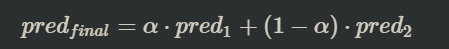

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [43]:
y_pred_logreg = logreg.predict(X_T)
y_pred_svc_grid = grid_search.predict(X_T)

alpha_values = np.linspace(0, 1, 11)

best_alpha = None
best_f1 = 0

for alpha in alpha_values:
    # Смешиваем предсказания
    y_pred_final = (alpha * y_pred_logreg + (1 - alpha) * y_pred_svc_grid).round().astype(int)
    f1_final = f1_score(y_T, y_pred_final, average='weighted')
    print(f'Alpha: {alpha:.1f} - F1-мера: {f1_final:.4f}')
    # Сохраняем лучшее значение alpha
    if f1_final > best_f1:
        best_f1 = f1_final
        best_alpha = alpha

print(f'\nЛучшее значение Alpha: {best_alpha:.1f}')
print(f'Лучшая F1-мера: {best_f1:.4f}')


c:\Users\Norge\anaconda3\envs\data_parsing\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Norge\anaconda3\envs\data_parsing\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Alpha: 0.0 - F1-мера: 0.6634
Alpha: 0.1 - F1-мера: 0.6634
Alpha: 0.2 - F1-мера: 0.6634
Alpha: 0.3 - F1-мера: 0.6634
Alpha: 0.4 - F1-мера: 0.6634
Alpha: 0.5 - F1-мера: 0.6634
Alpha: 0.6 - F1-мера: 0.0893
Alpha: 0.7 - F1-мера: 0.0893
Alpha: 0.8 - F1-мера: 0.0893
Alpha: 0.9 - F1-мера: 0.0893
Alpha: 1.0 - F1-мера: 0.0893

Лучшее значение Alpha: 0.0
Лучшая F1-мера: 0.6634


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

* Для улучшения моделей использовались методы балансировки классов, радиальное ядро, а также Grid Search для параметров SVC.
* Как ни странно, лучше всего себя показала неулучшенная модель логистической регрессии. F1 на отложенной выборке - 0.66.
* Модели на отложенной выборке показали более худший результат, чем при обучении, что указывает на их переобучение.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.